# DSC 530 - Spring 2023
## AARON BROWN 
### Week 12 - Final Project

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("s " + local)
        
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
import pandas as pd

covid_data = pd.read_csv('/Users/aaronbrown/Documents/ClassWork/DSC 530 -Data Exploration/project/covid_19_data.csv')
ranking_data = pd.read_csv('/Users/aaronbrown/Documents/ClassWork/DSC 530 -Data Exploration/project/health_ranking.csv')


### Statistical Question/Hypothesis
#### To find and determine key relationships between variables that infleuence the total number of cases in the United States, by state and counties.


### About Our Data
#### covid_data: This is data taken from the peak COVID year of 2020. It contains key COVID-19 information, including variables of interest such as: state, county, cases, deaths, and date of the record.
#### ranking_data: contains variables from health status, and chronic conditions, like: percent_fair_or_poor_health	percent_smokers	percent_adults_with_obesity	percent_excessive_drinking	income_ratio percent_adults_with_diabetes

### Data Cleaning/Preparation

Removing unneeded columns.

In [3]:
covid_county = covid_data.drop(columns = ['fips'])
covid_county

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0
1,2020-01-22,Snohomish,Washington,1,0
2,2020-01-23,Snohomish,Washington,1,0
3,2020-01-24,Cook,Illinois,1,0
4,2020-01-24,Snohomish,Washington,1,0
...,...,...,...,...,...
185643,2020-05-28,Sweetwater,Wyoming,26,0
185644,2020-05-28,Teton,Wyoming,100,1
185645,2020-05-28,Uinta,Wyoming,12,0
185646,2020-05-28,Washakie,Wyoming,34,3


Two new variables will be created: peak_case and peak_deaths.

In [4]:
covid_county = covid_county.sort_values(['county','state','date'])
covid_county['peak_case'] = covid_county.groupby(['county','state'])['cases'].diff().fillna(0) 
covid_county

,date,county,state,cases,deaths,peak_case
5000,2020-03-19,Abbeville,South Carolina,1,0,0.0
5873,2020-03-20,Abbeville,South Carolina,1,0,0.0
6877,2020-03-21,Abbeville,South Carolina,1,0,0.0
7997,2020-03-22,Abbeville,South Carolina,1,0,0.0
9208,2020-03-23,Abbeville,South Carolina,1,0,0.0
...,...,...,...,...,...,...
173083,2020-05-24,Ziebach,South Dakota,1,0,0.0
176048,2020-05-25,Ziebach,South Dakota,1,0,0.0
179013,2020-05-26,Ziebach,South Dakota,1,0,0.0
181985,2020-05-27,Ziebach,South Dakota,1,0,0.0


Data is grouped by: County, State.

In [5]:
covid_county['peak_deaths'] = covid_county.groupby(['county','state'])['deaths'].diff().fillna(0) 
covid_county

,date,county,state,cases,deaths,peak_case,peak_deaths
5000,2020-03-19,Abbeville,South Carolina,1,0,0.0,0.0
5873,2020-03-20,Abbeville,South Carolina,1,0,0.0,0.0
6877,2020-03-21,Abbeville,South Carolina,1,0,0.0,0.0
7997,2020-03-22,Abbeville,South Carolina,1,0,0.0,0.0
9208,2020-03-23,Abbeville,South Carolina,1,0,0.0,0.0
...,...,...,...,...,...,...,...
173083,2020-05-24,Ziebach,South Dakota,1,0,0.0,0.0
176048,2020-05-25,Ziebach,South Dakota,1,0,0.0,0.0
179013,2020-05-26,Ziebach,South Dakota,1,0,0.0,0.0
181985,2020-05-27,Ziebach,South Dakota,1,0,0.0,0.0


Removes states from the rank_county data that have missing values in the "county" column.

In [6]:
rank_county = ranking_data[['county','state','percent_fair_or_poor_health' , 'percent_smokers' ,
                               'percent_adults_with_obesity' , 'percent_excessive_drinking' , 
                               'income_ratio', 'percent_adults_with_diabetes']]
rank_county.dropna() 

,county,state,percent_fair_or_poor_health,percent_smokers,percent_adults_with_obesity,percent_excessive_drinking,income_ratio,percent_adults_with_diabetes
1,Autauga,Alabama,20.882987,18.081557,33.3,15.026031,5.234597,11.1
2,Baldwin,Alabama,17.509134,17.489033,31.0,17.958310,4.417767,10.7
3,Barbour,Alabama,29.591802,21.999985,41.7,12.844016,5.681410,17.6
4,Bibb,Alabama,19.439724,19.114200,37.6,15.570042,4.368581,14.5
5,Blount,Alabama,21.745293,19.208672,33.8,14.230594,4.430262,17.0
...,...,...,...,...,...,...,...,...
3188,Sweetwater,Wyoming,14.813082,18.073422,29.8,22.871908,3.975923,8.8
3189,Teton,Wyoming,11.914358,14.546369,12.4,25.533577,3.775274,2.2
3190,Uinta,Wyoming,15.537464,17.212675,35.8,19.113357,4.350061,11.3
3191,Washakie,Wyoming,15.955971,16.859400,28.8,16.523261,3.327463,11.7


Combines data to help compare the number of cases and deaths with other mortality encouraging conditions (eg. smoking, obesity, drinking, and overall health status).

In [7]:
sample_data = covid_county[covid_county.date == '2020-05-28']
sample_data

,date,county,state,cases,deaths,peak_case,peak_deaths
184868,2020-05-28,Abbeville,South Carolina,37,0,2.0,0.0
183742,2020-05-28,Acadia,Louisiana,401,22,4.0,4.0
185332,2020-05-28,Accomack,Virginia,807,12,27.0,0.0
183210,2020-05-28,Ada,Idaho,803,22,3.0,0.0
183436,2020-05-28,Adair,Iowa,8,0,0.0,0.0
...,...,...,...,...,...,...,...
182770,2020-05-28,Yuma,Arizona,822,11,40.0,1.0
182962,2020-05-28,Yuma,Colorado,20,0,1.0,0.0
185288,2020-05-28,Zapata,Texas,8,0,0.0,0.0
185289,2020-05-28,Zavala,Texas,11,0,0.0,0.0


In [8]:
health_totals = pd.merge(sample_data[['county','state','cases','deaths']], rank_county, how = 'left', on= ['county','state'])
health_totals

,county,state,cases,deaths,percent_fair_or_poor_health,percent_smokers,percent_adults_with_obesity,percent_excessive_drinking,income_ratio,percent_adults_with_diabetes
0,Abbeville,South Carolina,37,0,19.895036,17.323519,36.7,15.904724,5.219207,15.8
1,Acadia,Louisiana,401,22,20.890035,21.534088,38.4,19.778029,5.804627,11.4
2,Accomack,Virginia,807,12,20.089199,18.316929,36.3,15.480572,4.160476,15.9
3,Ada,Idaho,803,22,11.474882,11.990701,25.6,17.876234,4.478032,7.9
4,Adair,Iowa,8,0,13.854797,15.583571,31.5,19.872727,3.776499,12.0
...,...,...,...,...,...,...,...,...,...,...
2973,Yuma,Arizona,822,11,22.726376,13.327036,36.9,17.706147,4.361085,14.1
2974,Yuma,Colorado,20,0,15.268202,14.277809,27.8,17.208147,4.119748,9.3
2975,Zapata,Texas,8,0,35.610705,17.275488,31.2,14.865738,5.416121,4.7
2976,Zavala,Texas,11,0,40.990687,19.871284,24.2,13.780125,5.051775,4.1


Will exclude 160+ observations from the data due to missing values in cases/deaths. An additional 87 counties will be dropped to to missing health data values.

In [9]:
health_totals.dropna()

,county,state,cases,deaths,percent_fair_or_poor_health,percent_smokers,percent_adults_with_obesity,percent_excessive_drinking,income_ratio,percent_adults_with_diabetes
0,Abbeville,South Carolina,37,0,19.895036,17.323519,36.7,15.904724,5.219207,15.8
1,Acadia,Louisiana,401,22,20.890035,21.534088,38.4,19.778029,5.804627,11.4
2,Accomack,Virginia,807,12,20.089199,18.316929,36.3,15.480572,4.160476,15.9
3,Ada,Idaho,803,22,11.474882,11.990701,25.6,17.876234,4.478032,7.9
4,Adair,Iowa,8,0,13.854797,15.583571,31.5,19.872727,3.776499,12.0
...,...,...,...,...,...,...,...,...,...,...
2973,Yuma,Arizona,822,11,22.726376,13.327036,36.9,17.706147,4.361085,14.1
2974,Yuma,Colorado,20,0,15.268202,14.277809,27.8,17.208147,4.119748,9.3
2975,Zapata,Texas,8,0,35.610705,17.275488,31.2,14.865738,5.416121,4.7
2976,Zavala,Texas,11,0,40.990687,19.871284,24.2,13.780125,5.051775,4.1


### Histograms

<AxesSubplot:title={'center':'Cases of Peak Year'}, ylabel='Frequency'>

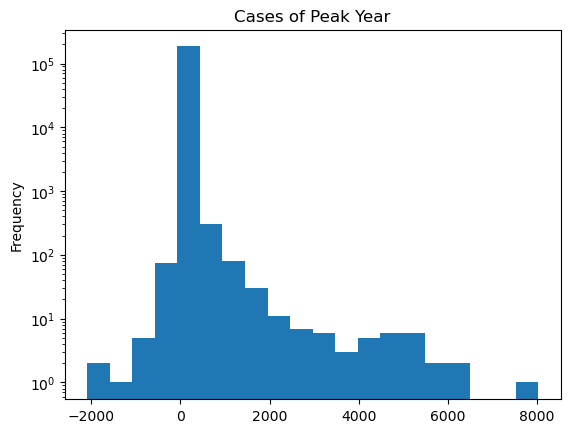

In [10]:
covid_county.peak_case.plot.hist(bins = 20, logy = True, title = 'Cases of Peak Year')

<AxesSubplot:title={'center':'Cases of Peak Year'}, ylabel='Frequency'>

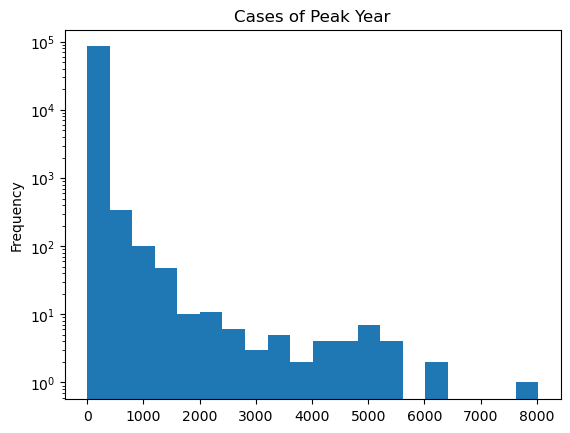

In [11]:
covid_county1 = covid_county.loc[covid_county['peak_case']>0]
covid_county1.peak_case.plot.hist(bins = 20,logy = True, title = 'Cases of Peak Year')

<AxesSubplot:title={'center':'Deaths of Peak Year'}, ylabel='Frequency'>

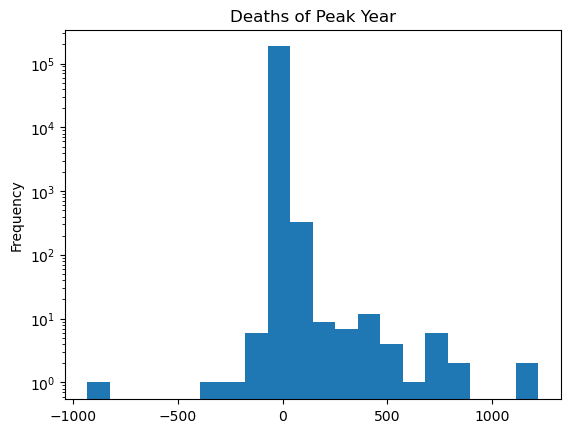

In [12]:
covid_county.peak_deaths.plot.hist(bins = 20,logy = True, title = 'Deaths of Peak Year')

<AxesSubplot:title={'center':'Number Cases by County'}, ylabel='Frequency'>

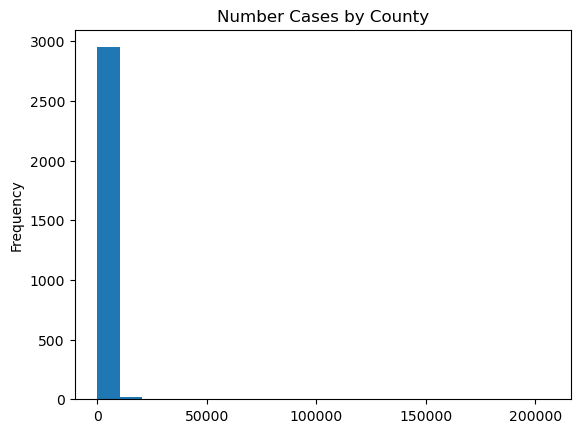

In [13]:
health_totals.cases.plot.hist(bins = 20, title = 'Number Cases by County')

<AxesSubplot:title={'center':'Percent with Poor/Fair Health Status'}, ylabel='Frequency'>

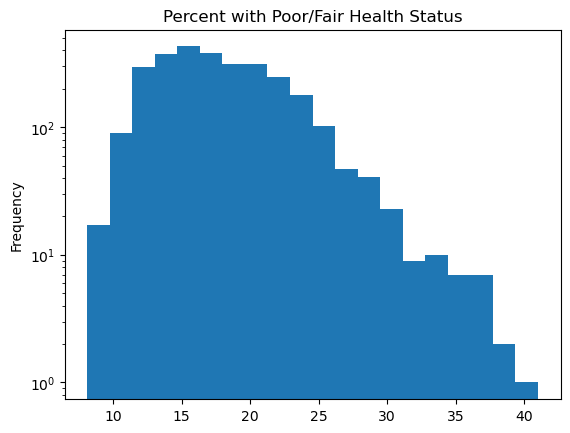

In [14]:
health_totals.percent_fair_or_poor_health.plot.hist(bins = 20, 
                title = 'Percent with Poor/Fair Health Status', logy = True)

In [15]:
health_totals_1 = pd.DataFrame()
health_totals_1['mean'] = health_totals.mean()
health_totals_1['median'] = health_totals.median()
health_totals_1['var'] = health_totals.var()
health_totals_1['std'] = health_totals.std()
health_totals_1

/var/folders/8g/4dlsnvvj5l7738w04p6b2xk80000gn/T/ipykernel_89579/3720952239.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  health_totals_1['mean'] = health_totals.mean()
/var/folders/8g/4dlsnvvj5l7738w04p6b2xk80000gn/T/ipykernel_89579/3720952239.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  health_totals_1['median'] = health_totals.median()
/var/folders/8g/4dlsnvvj5l7738w04p6b2xk80000gn/T/ipykernel_89579/3720952239.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  health_t

,mean,median,var,std
cases,581.075890,43.000000,2.089346e+07,4570.936959
deaths,34.123909,1.000000,1.686084e+05,410.619516
percent_fair_or_poor_health,18.034635,17.343802,2.234296e+01,4.726834
percent_smokers,17.532791,17.087545,1.255117e+01,3.542763
percent_adults_with_obesity,33.026591,33.300000,2.948427e+01,5.429942
percent_excessive_drinking,17.483325,17.559710,1.008055e+01,3.174989
income_ratio,4.520333,4.411360,5.491752e-01,0.741064
percent_adults_with_diabetes,12.237759,11.700000,1.635616e+01,4.044275


In [16]:
covid_county2 = pd.DataFrame()
covid_county2['mean'] = covid_county1[['peak_case','peak_deaths']].mean()
covid_county2['median'] = covid_county1[['peak_case','peak_deaths']].median()
covid_county2['var'] = covid_county1[['peak_case','peak_deaths']].var()
covid_county2['std'] = covid_county1[['peak_case','peak_deaths']].std()
covid_county2

,mean,median,var,std
peak_case,20.504134,3.0,14241.769449,119.338885
peak_deaths,1.165234,0.0,158.266400,12.580397


In [17]:
import thinkstats2
import thinkplot

### Probability Mass Function (PMF)

In [18]:
pmf_peak_cases = thinkstats2.Pmf(covid_county1['peak_case'], label = 'Cases')
pmf_peak_deaths = thinkstats2.Pmf(covid_county1['peak_deaths'], label = 'Deaths')
pmf_peak_cases.Normalize()
pmf_peak_deaths.Normalize()

0.9999999999999943

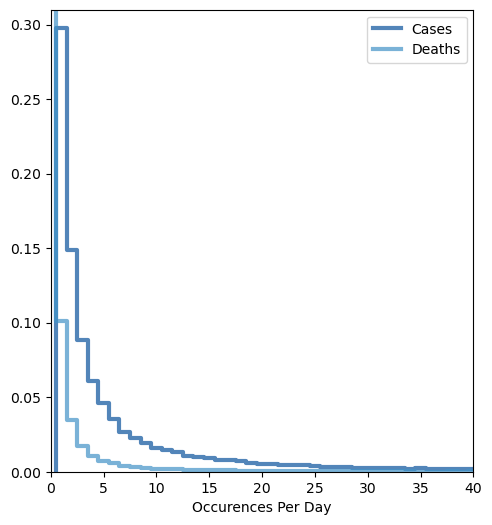

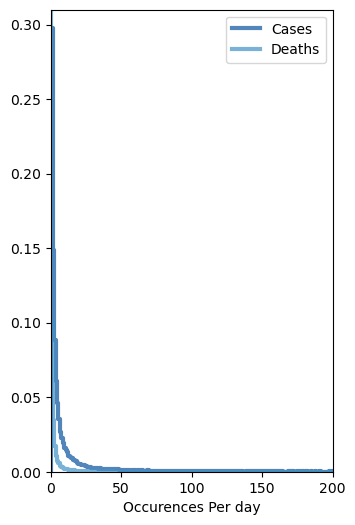

<Figure size 800x600 with 0 Axes>

In [19]:
thinkplot.PrePlot(2,cols = 2)
thinkplot.Pmfs([pmf_peak_cases,pmf_peak_deaths])
thinkplot.Show(xlabel = 'Occurences Per Day',axis = [0,40,0,0.31])
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_peak_cases,pmf_peak_deaths])
thinkplot.Show(xlabel = 'Occurences Per day',axis = [0,200,0,0.31])

Initially was working with a filter to compare the data between the State of New York and the rest of the USA. Yet I realized that sinze Deaths are dependent on Cases, you can think of it as a subset with an unfortunate categorical variable. The data continues outside the scope of the graph but to be able to see the nuances I decided to cut off the tail end. The Light blue graph represents the probability of the number of people to die on a certain day due to coronavirus. The darker blue represents the probability of the number of cases that will happen on a certain day.

### Cumulative Distribution Function (CDF)

Caculation and plot of the CDF - Number of Cases by County.

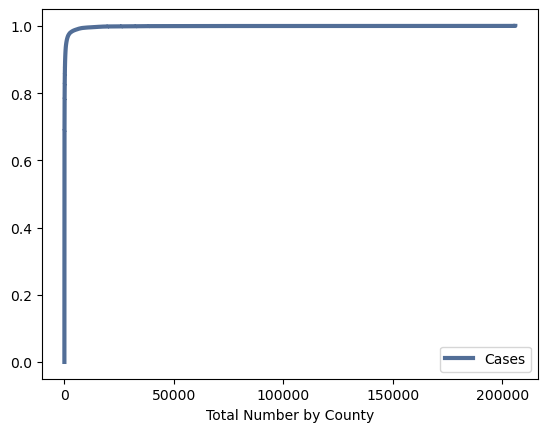

<Figure size 800x600 with 0 Axes>

In [20]:
cdf = thinkstats2.Cdf(covid_county.cases, label = 'Cases')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Total Number by County', y = 'CDF')

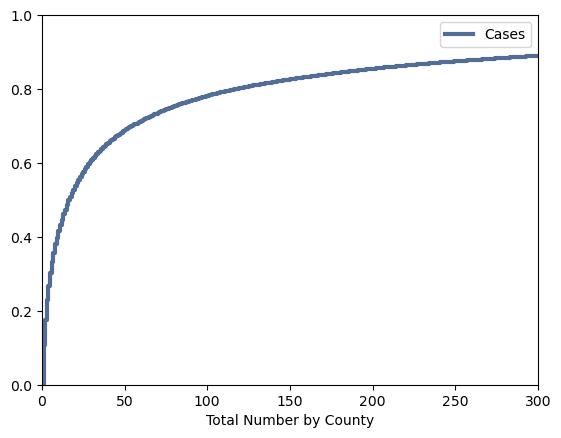

<Figure size 800x600 with 0 Axes>

In [21]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Total Number by County', y = 'CDF',axis = [0,300,0,1])

The slope produced by graphing the CDF indicated that about 70% of all US counties fall within 0-50 cases. To account for outliers, we appropriated 90% of the data.

### Distribution of the Data

Since the CDF graph above looks very similar to a pareto distribution, we will log transform to see if a straight line is produced, suggesting a good fit.

/Users/aaronbrown/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


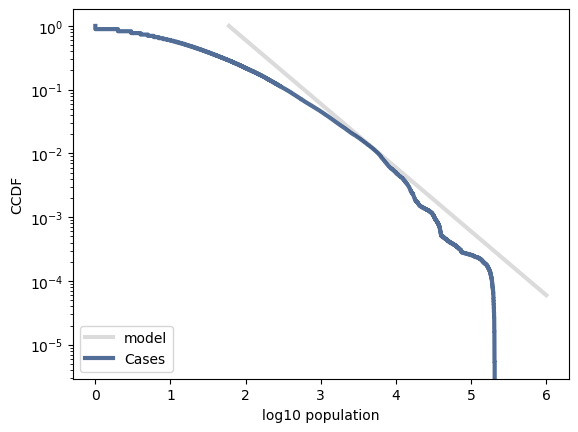

In [22]:
import numpy as np
cases_log = np.log10(covid_county.cases)
cdf_log = thinkstats2.Cdf(cases_log, label = 'Cases')

xs, ys = thinkstats2.RenderParetoCdf(xmin=60, alpha=1, low=0, high=1e6)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

A straight line is not produced here, which suggests that the Pareto Distribution is not a great fit either.

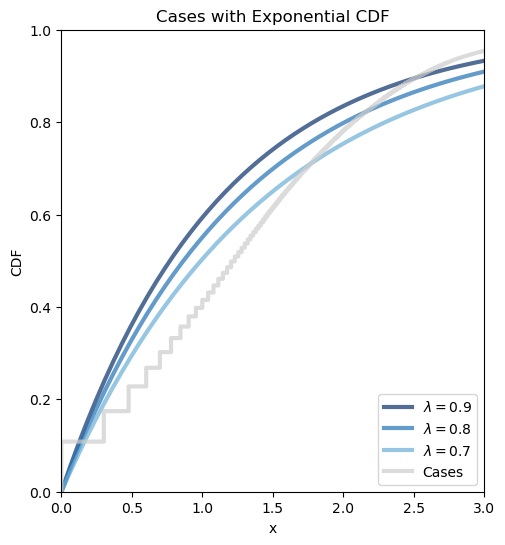

In [23]:
thinkplot.PrePlot(3, cols = 2)
for lam in [.9,.8,0.7]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r'$\lambda=%g$' % lam
    thinkplot.Plot(xs, ps, label=label)
thinkplot.Cdf(cdf_log, color='0.8', yscale = 'log') 
thinkplot.Config(title='Cases with Exponential CDF', xlabel='x', ylabel='CDF', 
                 loc='lower right',axis = [0,3,0,1])

The Exponential Distribution does not appear to be a good estimate of the log-log CDF of the total number of cases by county.

<AxesSubplot:xlabel='cases', ylabel='percent_smokers'>

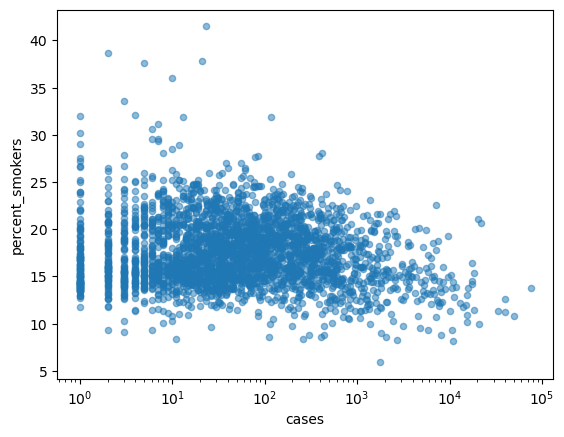

In [24]:
health_totals.plot(x= 'cases', y = 'percent_smokers', kind = 'scatter', logx = True, alpha = .5)

Here, the "number of cases" by "percent of smokers" is plotted; smoking does not directly relate to the number of COVID cases, as we see above. The number of cases does not seem to increase (or decrease) with increased smoking percentages.

<AxesSubplot:xlabel='deaths', ylabel='percent_smokers'>

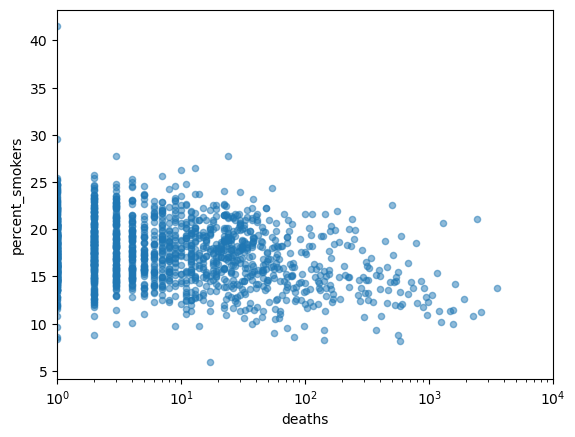

In [25]:
health_totals.plot(x= 'deaths', y = 'percent_smokers', kind = 'scatter', logx = True, alpha = .5, xlim = (1,1e4))

Contrary to what was expected, the number of deaths did not seem to increase with increasing smoking perscentages. Seeing that COVID-19 is a respiratory disease, a more obvious relationship was expected between the two variables.

<AxesSubplot:xlabel='cases', ylabel='percent_fair_or_poor_health'>

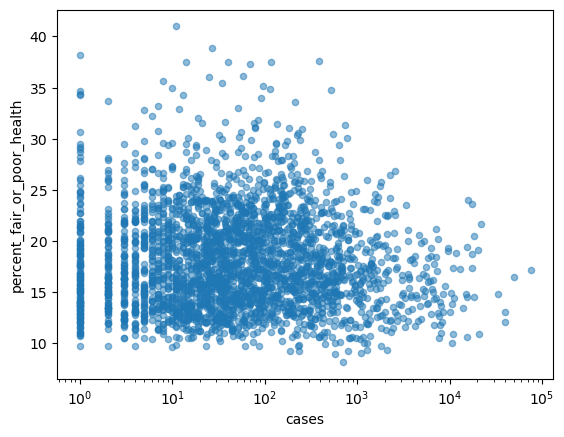

In [26]:
health_totals.plot(x= 'cases', y = 'percent_fair_or_poor_health', kind = 'scatter', logx = True, alpha = .5)

No significant relationship can be seen between the number of cases, and poor/fair overall health (above). A relationship between the number of deaths, and poor/fair overall health also seems to be nonexistant (below). 

<AxesSubplot:xlabel='deaths', ylabel='percent_fair_or_poor_health'>

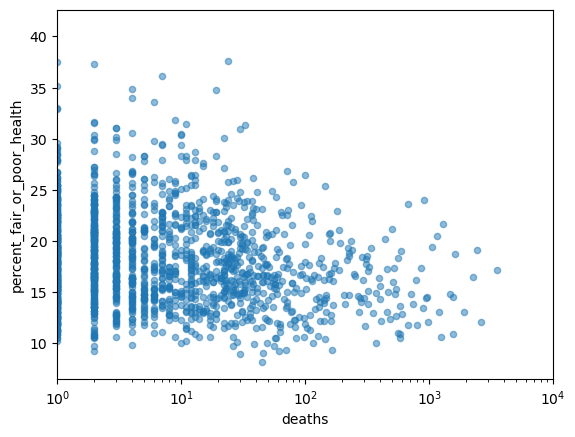

In [27]:
health_totals.plot(x= 'deaths', y = 'percent_fair_or_poor_health', kind = 'scatter', logx = True, alpha = .5, xlim = (1,1e4))

Below are the plots for "percent excessive drinking" vs the number of cases, and the number of deaths.

<AxesSubplot:xlabel='cases', ylabel='percent_excessive_drinking'>

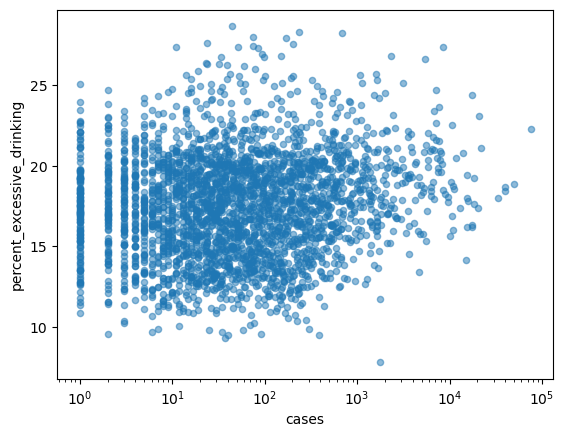

In [28]:
health_totals.plot(x= 'cases', y = 'percent_excessive_drinking', kind = 'scatter', logx = True, alpha = .5)

No obvious relationship can be determined between percent_excessive_drinking and cases.

<AxesSubplot:xlabel='deaths', ylabel='percent_excessive_drinking'>

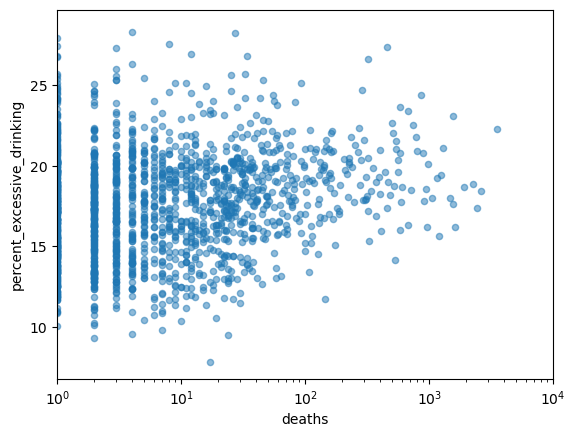

In [29]:
health_totals.plot(x= 'deaths', y = 'percent_excessive_drinking', kind = 'scatter',
                     logx = True, alpha = .5, xlim = (1,1e4))

In this case, the relationship between percent_excessive_drinking and deaths seems do direct in an upward trend.

<AxesSubplot:xlabel='cases', ylabel='percent_adults_with_diabetes'>

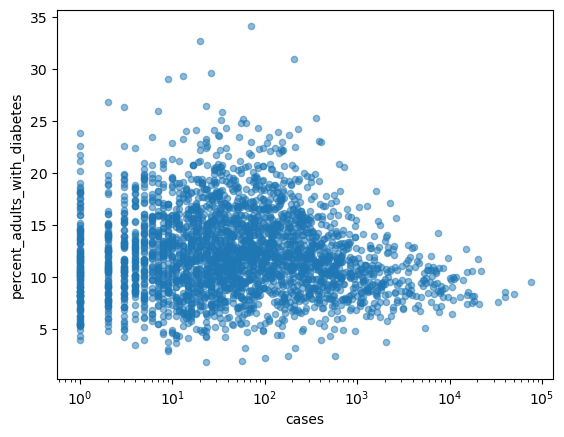

In [30]:
health_totals.plot(x= 'cases', y = 'percent_adults_with_diabetes', kind = 'scatter', logx = True, alpha = .5)

<AxesSubplot:xlabel='deaths', ylabel='percent_adults_with_diabetes'>

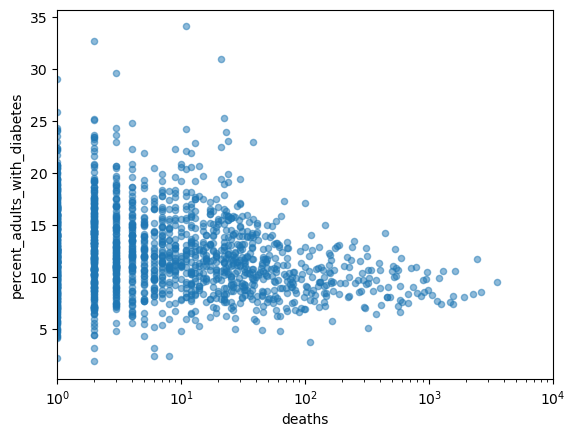

In [31]:
health_totals.plot(x= 'deaths', y = 'percent_adults_with_diabetes', kind = 'scatter',
                     logx = True, alpha = .5, xlim = (1,1e4))

In [32]:
hat_filter = health_totals[health_totals.deaths > 5]

<AxesSubplot:xlabel='deaths', ylabel='percent_adults_with_diabetes'>

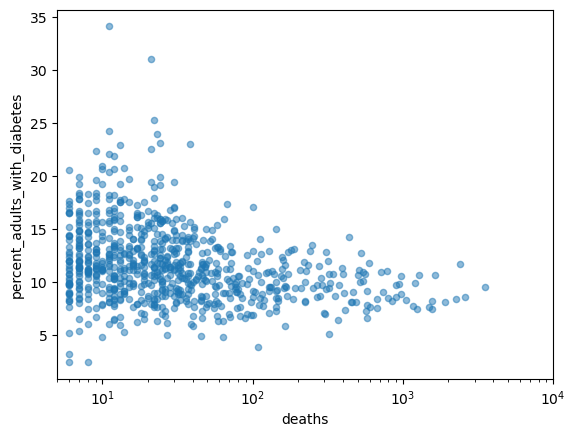

In [33]:
hat_filter.plot(x= 'deaths', y = 'percent_adults_with_diabetes', kind = 'scatter',
                     logx = True, alpha = .5, xlim = (5,1e4))

<AxesSubplot:xlabel='deaths', ylabel='percent_adults_with_obesity'>

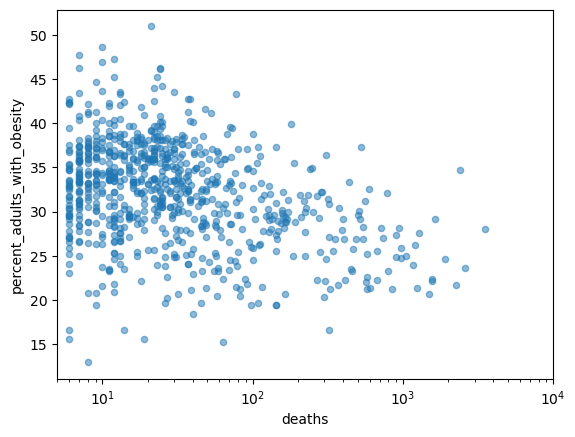

In [34]:
hat_filter.plot(x= 'deaths', y = 'percent_adults_with_obesity', kind = 'scatter',
                     logx = True, alpha = .5, xlim = (5,1e4))

In [35]:
health_totals.corr()

,cases,deaths,percent_fair_or_poor_health,percent_smokers,percent_adults_with_obesity,percent_excessive_drinking,income_ratio,percent_adults_with_diabetes
cases,1.000000,0.961989,-0.067480,-0.153402,-0.174721,0.092551,0.105900,-0.115397
deaths,0.961989,1.000000,-0.075720,-0.143611,-0.171740,0.090817,0.117204,-0.107484
percent_fair_or_poor_health,-0.067480,-0.075720,1.000000,0.733166,0.437596,-0.663194,0.548911,0.485468
percent_smokers,-0.153402,-0.143611,0.733166,1.000000,0.508141,-0.456785,0.400853,0.489241
percent_adults_with_obesity,-0.174721,-0.171740,0.437596,0.508141,1.000000,-0.322607,0.173003,0.518001
percent_excessive_drinking,0.092551,0.090817,-0.663194,-0.456785,-0.322607,1.000000,-0.317226,-0.474611
income_ratio,0.105900,0.117204,0.548911,0.400853,0.173003,-0.317226,1.000000,0.256205
percent_adults_with_diabetes,-0.115397,-0.107484,0.485468,0.489241,0.518001,-0.474611,0.256205,1.000000


In [36]:
hat_filter = health_totals[health_totals.deaths > 5]
hat_filter.corr()

,cases,deaths,percent_fair_or_poor_health,percent_smokers,percent_adults_with_obesity,percent_excessive_drinking,income_ratio,percent_adults_with_diabetes
cases,1.000000,0.962790,-0.110231,-0.260420,-0.275905,0.132584,0.150393,-0.196161
deaths,0.962790,1.000000,-0.127434,-0.240905,-0.270842,0.131229,0.170120,-0.182626
percent_fair_or_poor_health,-0.110231,-0.127434,1.000000,0.733144,0.593747,-0.661982,0.513058,0.586522
percent_smokers,-0.260420,-0.240905,0.733144,1.000000,0.664555,-0.443172,0.337297,0.600481
percent_adults_with_obesity,-0.275905,-0.270842,0.593747,0.664555,1.000000,-0.464446,0.145436,0.683393
percent_excessive_drinking,0.132584,0.131229,-0.661982,-0.443172,-0.464446,1.000000,-0.235002,-0.561714
income_ratio,0.150393,0.170120,0.513058,0.337297,0.145436,-0.235002,1.000000,0.200631
percent_adults_with_diabetes,-0.196161,-0.182626,0.586522,0.600481,0.683393,-0.561714,0.200631,1.000000


Here, we can see that there is a pretty obvious relationship between cases and deaths, likely since you have to have a case of COVID prior to dying from COVID.
This chart also provides some additional insight to the realtionship between cases/deaths and our vaiables of interest. As we saw in previous graphs, our comparisons so far have been weak in terms of relationship strength, but the chart does shed light on other possible relationships between variables, for instance, a positive relationship is shown between "percent_smokers" and "percent_fair_or_poor_health", this is common knowledge, but interesting to see in our data.

### Hypothesis Testing

To ensure that the relationships shown above are statistically reinforced, and that the probability that any effects are not occuring by chance, hypothesis testing is performed.

In [37]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [38]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

Correlation: percent_adults_with_obesity

In [39]:
data = hat_filter.deaths, hat_filter.percent_adults_with_obesity
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

Our P-value in this case is less than 0.001.

In [40]:
import statsmodels.api as sm
hat_filter = hat_filter.dropna()
    
y = hat_filter.deaths
X = hat_filter.percent_adults_with_obesity
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 deaths   R-squared (uncentered):                   0.081
Model:                            OLS   Adj. R-squared (uncentered):              0.080
Method:                 Least Squares   F-statistic:                              69.22
Date:                Sat, 03 Jun 2023   Prob (F-statistic):                    3.89e-16
Time:                        19:34:55   Log-Likelihood:                         -5553.7
No. Observations:                 786   AIC:                                  1.111e+04
Df Residuals:                     785   BIC:                                  1.111e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
percent_adults_with_obesity     2.5794      0.310      8.320      0.000       1.971       3.188
==============================================================================
Omnibus:                      966.975   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91329.898
Skew:                           6.295   Prob(JB):                         0.00
Kurtosis:                      54.286   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With a p-value < .05, we can assume that for every 1% of the county's populatio that is obese, 2.58 deaths can be expected.

In [41]:
y = hat_filter.deaths
X = hat_filter[['percent_adults_with_obesity', 'percent_smokers']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 deaths   R-squared (uncentered):                   0.082
Model:                            OLS   Adj. R-squared (uncentered):              0.079
Method:                 Least Squares   F-statistic:                              34.80
Date:                Sat, 03 Jun 2023   Prob (F-statistic):                    3.31e-15
Time:                        19:34:55   Log-Likelihood:                         -5553.5
No. Observations:                 786   AIC:                                  1.111e+04
Df Residuals:                     784   BIC:                                  1.112e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
percent_adults_with_obesity     1.2392      2.056      0.603      0.547      -2.796       5.274
percent_smokers                 2.5691      3.895      0.660      0.510      -5.077      10.215
==============================================================================
Omnibus:                      967.787   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91746.810
Skew:                           6.303   Prob(JB):                         0.00
Kurtosis:                      54.406   Cond. No.                         16.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

High p-values in this case suggests no relationship between deaths and percent_adults_with_obesity and percent_smokers.

In [42]:
y = hat_filter.deaths
X = hat_filter[['percent_adults_with_obesity', 'percent_adults_with_diabetes']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 deaths   R-squared (uncentered):                   0.083
Model:                            OLS   Adj. R-squared (uncentered):              0.080
Method:                 Least Squares   F-statistic:                              35.27
Date:                Sat, 03 Jun 2023   Prob (F-statistic):                    2.15e-15
Time:                        19:34:55   Log-Likelihood:                         -5553.1
No. Observations:                 786   AIC:                                  1.111e+04
Df Residuals:                     784   BIC:                                  1.112e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
percent_adults_with_obesity      4.1786      1.435      2.911      0.004       1.361       6.996
percent_adults_with_diabetes    -4.4038      3.860     -1.141      0.254     -11.980       3.173
==============================================================================
Omnibus:                      967.428   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91513.372
Skew:                           6.300   Prob(JB):                         0.00
Kurtosis:                      54.338   Cond. No.                         14.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
y = hat_filter.deaths
X = hat_filter[['percent_adults_with_obesity', 'percent_fair_or_poor_health']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 deaths   R-squared (uncentered):                   0.087
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              37.39
Date:                Sat, 03 Jun 2023   Prob (F-statistic):                    3.08e-16
Time:                        19:34:55   Log-Likelihood:                         -5551.1
No. Observations:                 786   AIC:                                  1.111e+04
Df Residuals:                     784   BIC:                                  1.112e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
percent_adults_with_obesity    -0.8618      1.540     -0.560      0.576      -3.885       2.161
percent_fair_or_poor_health     6.3026      2.763      2.281      0.023       0.879      11.726
==============================================================================
Omnibus:                      964.791   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91146.118
Skew:                           6.268   Prob(JB):                         0.00
Kurtosis:                      54.244   Cond. No.                         11.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Other than in the simple regression model (death*percent_adults_with_obesity), the P-values above suggest no relationship between our dependent variable (death) and our entered variables. The  Simple Linear Regression Model appears to be the best fit for our data.

#### Resources

http://thinkstats2.com
Copyright 2016 Allen B. Downey
MIT License: https://opensource.org/licenses/MIT